# Transformers, what can they do?

Install the Transformers and tokenizer algorithm to run this notebook.

In [1]:
!pip install datasets evaluate transformers[sentencepiece]
# tek seferde tüm datasetleri indirir

# hazir modellerle calisacaksak gpu indiririz; tensorflow ve pytorch icin tpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

## Sentiment_Analysis

In [2]:
from transformers import pipeline # islemleri otomatize etmek icin pipeline

classifier = pipeline("sentiment-analysis") # hangi gorevi yapmasini istedigini evriyoruz task parametrrsine: nlp kismindan
# sentiment analysis'i seciyoruz /shift+tab)
# bir diger paramtere pretrainedconfig (hangi modeli kullanmak istedigimiz) ve pretrainedtokenizer (hangi
# tokenizeri secmek istersin). defaultu any, kendince en uygun olani. defaultta birakmak tavsiye eidlir.
# ilk olarak defaultla yapiyoruz, modeli kendisine sectirelim

# en son xformers uyarisi nnedeniyle daha hizli calismasi icin xformersi kuralim asagida

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [3]:
!pip install xformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 8.7 MB/s eta 0:00:00


In [4]:
%%time 
# hem cpu hem gpu uzerinden tahmin larak calisma maliyetlerini gozleyelim
classifier("I've been waiting for a HuggingFace course my whole life.")

CPU times: user 46.5 ms, sys: 6.73 ms, total: 53.2 ms
Wall time: 161 ms


[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

In [5]:
classifier = pipeline("sentiment-analysis", device="cuda:0") # runtimedan GPU secmemiz transfomrers modellerinde yeterli degil, ayni
# zamannda device paramtresini cuda:0 yaparsak gpu devreye girer. cuda:0 bir kere tanittik, her seferinde
# tekrar gereek yok. Her pipeline icinde tanimlamamiz gerekir. pipelinela tanimladigimiz classifier icin
# tekrar gerek yok. baska bir pipeline tanimlarsak orda tekrar cuda:0 tanimlamaliyiz.
# warning: pipeline kullaniyorsan kenndi modelini secmek isteyebilirsin diyor.. nasil sececegimizi asagida gorecegiz.

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
%%time
classifier("I've been waiting for a HuggingFace course my whole life.")
# 46.5 saniye idi, 11.3e dustu

CPU times: user 11.3 ms, sys: 16 µs, total: 11.3 ms
Wall time: 18 ms


[{'label': 'POSITIVE', 'score': 0.9598046541213989}]

In [9]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

# yukarda hugginface linkine tiklayinca modelin kartina goturur bizi ve ordan bu modelin sadece pozitif ve negatif tahmin yaptigini goruruz
# tum diger bililgiler icin linke.

[{'label': 'POSITIVE', 'score': 0.9598046541213989},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## How can we use this model in our own data?

In [10]:
classifier("I've been waiting for a HuggingFace course my whole life.")[0]

{'label': 'POSITIVE', 'score': 0.9598046541213989}

In [11]:
# labeli nasil cekecegiz
classifier("I've been waiting for a HuggingFace course my whole life.")[0]["label"]

'POSITIVE'

In [12]:
# bunu bir for loopla her documenti degerlendirip y_pred'e labllari atar ve daha sonra y_testle karsilalastirabiliriz
y_pred = []
for i in ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]:
  if classifier(i)[0]['label']=="POSITIVE":
    y_pred.append(0)
  else:
    y_pred.append(1)
y_pred

[0, 1]

## Zero_Shot Classification

In [13]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", device="cuda:0")

#"Zero-shot-classification", bir modelin hiç görmediği bir sınıfa ait örnekleri doğru bir şekilde sınıflandırabilme yeteneğidir.
# modelin daha önce hiç görmediği (eğitim almadığı) sınıflara ilişkin tahmin etme kapasitesini ölçüyoruz.
# Bu yetenek, genellikle bir modelin genelleme kapasitesini ölçer. Terim, öğrenme sürecinde hedef sınıfların hiç görülmediği durumları ifade eder.

# outputtaki linkten huggingface'e ayrintilarina bakariz modelin

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [14]:
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business", "art"],
)
# hic gormedigi bir texti cesitli labellarla verelim ve ne olmasini tahmine tmesini isteyelim. education cikti. dogru pred

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'art', 'politics'],
 'scores': [0.7683148384094238,
  0.10186293721199036,
  0.09031695872545242,
  0.039505306631326675]}

In [15]:
# birden fazla cumle icin zero-shot yapacaksak liste icinde vermeliyiz.
classifier(
    ["world cup will be held in qatar this year", "ballet and theater are indispensable for me.", "This year, a new law on animal rights was enacted."],
    candidate_labels=["education", "politics", "business", "art", "sport", "justice", "music", "space"],
)

[{'sequence': 'world cup will be held in qatar this year',
  'labels': ['sport',
   'politics',
   'space',
   'business',
   'music',
   'justice',
   'art',
   'education'],
  'scores': [0.8292061686515808,
   0.038249898701906204,
   0.03533438965678215,
   0.032762233167886734,
   0.020598281174898148,
   0.018067630007863045,
   0.016721751540899277,
   0.009059661068022251]},
 {'sequence': 'ballet and theater are indispensable for me.',
  'labels': ['art',
   'music',
   'justice',
   'sport',
   'space',
   'business',
   'education',
   'politics'],
  'scores': [0.7915460467338562,
   0.12224036455154419,
   0.028442729264497757,
   0.019930677488446236,
   0.01881854236125946,
   0.008161953650414944,
   0.008062859065830708,
   0.0027968513313680887]},
 {'sequence': 'This year, a new law on animal rights was enacted.',
  'labels': ['justice',
   'sport',
   'space',
   'business',
   'politics',
   'art',
   'music',
   'education'],
  'scores': [0.49627479910850525,
   0.123

## Predict the next token

In [16]:
from transformers import pipeline

unmasker = pipeline("fill-mask", device="cuda:0")

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [17]:
unmasker("This course will teach you all about <mask> models.", top_k=2) # top_k'yi artirirsak o kadar label onerir
# 0.19 dusuk degil, yuzlerce olasiliktan seciyor bunu

[{'score': 0.19619779288768768,
  'token': 30412,
  'token_str': ' mathematical',
  'sequence': 'This course will teach you all about mathematical models.'},
 {'score': 0.040527261793613434,
  'token': 38163,
  'token_str': ' computational',
  'sequence': 'This course will teach you all about computational models.'}]

## Named Entity Recognition (Token Classification)

In [18]:
from transformers import pipeline

ner = pipeline("ner", aggregation_strategy="simple", device="cuda:0") #grouped_entities=True (su an aslinda agg_strategy yerine group_entities
# var ama ilerki versiyonalrda kaldirilip yerine agg_strategy konacak onun da)

# agg_strategy ne, kaldirirsak ne olur: tum tokenleri ekleri ve kokleri olacak sekilde ayri ayri tokenlestirir ve okunurlugu 
# cok zorlasir, kaldirip deneyebiliriz

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [19]:
ner("My name is Sylvain and I work at Hugging Face in Brooklyn. my phone is 5355555555 my birtday is Saturday")

# bu model personel, organizasyon ve location entitylerini bulmak uzere egitilmis. aagida 3unu de buldu

[{'entity_group': 'PER',
  'score': 0.99738055,
  'word': 'Sylvain',
  'start': 11,
  'end': 18},
 {'entity_group': 'ORG',
  'score': 0.98332757,
  'word': 'Hugging Face',
  'start': 33,
  'end': 45},
 {'entity_group': 'LOC',
  'score': 0.9931579,
  'word': 'Brooklyn',
  'start': 49,
  'end': 57}]

## Question Answering

In [20]:
from transformers import pipeline

question_answerer = pipeline("question-answering", device="cuda:0")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)
# sorular ancak modele ebslenen textler uzerinden sorulabilir.
# bu sekilde ilk soru, sonra da sorunun cevaplanacagi text-context verilir

# %69 ile bilmis organizassynu, ama kucuk bir model oldugu icin bu kotu skor verdi, cevap cok acik ve nnet cunku
# linkten modele bakarsak kullandigi SQUAD datasetinin 87k'lik oldugunu yani kucuk oldugunu goruruz. Kullandigi sorular
# ve verdigi cevaplar linkte aciklamalarda mevcut.

{'score': 0.6949766278266907, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [ ]:
# sorulari artiralim
question_answerer(
    question=["Where do you work?", "In which city do you work?", "what is your name"],
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

[{'score': 0.714407742023468,
  'start': 33,
  'end': 45,
  'answer': 'Hugging Face'},
 {'score': 0.8743696212768555, 'start': 49, 'end': 57, 'answer': 'Brooklyn'},
 {'score': 0.990521252155304, 'start': 11, 'end': 18, 'answer': 'Sylvain'}]

## Summarization

In [ ]:
# ozet cikarma
from transformers import pipeline

summarizer = pipeline("summarization", device="cuda:0")

# cok da basairli degil. bu transformers modeller icinde summarization en basarisiz oldugu alanlardan birisi

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' America has changed dramatically during recent years . The number of engineering graduates in the U.S. has declined in traditional engineering disciplines such as mechanical, civil,    electrical, chemical, and aeronautical engineering . Rapidly developing economies such as China and India continue to encourage and advance the teaching of engineering .'}]

## Translation

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en", device="cuda:0")
# default modeli Helsinki-NLP/opus-mt-fr-en fr.dan in.ye ceviri icin
# trannslationda da cok basarili degil.

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translator("Ce cours est produit par Hugging Face.")

[{'translation_text': 'This course is produced by Hugging Face.'}]

## How to use a pre-trained model in Hugginface

### Question Answering

In [ ]:
from transformers import pipeline
# modeli nasil sececegiz: hugginface'e gidip models'a girip NLP models kisminda burdaki gibi taske gore (Q&answering burda) tiklar ve genelde
# en fazla tercih edileni ya da icine baktigimizda skorlaari en iyi olani vs seceriz, digerlerini de incelmeek lazim ama
# kac data ile egitilmisler ona gore de bakabiliriz.

# model kartinda isminin yaninda clone sembolune tiklar ve pipeline icinnde model parametresine veririz. device cuda ile GPU kullanimina dikkat

question_answerer = pipeline("question-answering", model="deepset/roberta-base-squad2", device="cuda:0")

In [ ]:
question_answerer(
    question=["Which team won Real Madrid?", "which team lost?"],
    context="Barcelona became the champion of Spain after beating Real Madrid",
)

[{'score': 0.4937596023082733, 'start': 0, 'end': 9, 'answer': 'Barcelona'},
 {'score': 0.536912202835083, 'start': 53, 'end': 64, 'answer': 'Real Madrid'}]

### Translation

In [ ]:
from transformers import pipeline
# tranlsation icin huggin face - models - NLP translation - languages - searvh ile turkish.. cikan modellerden tr-en olanlardan seceriz
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-tr-en", device="cuda:0")

In [ ]:
translator("merhaba nasılsın Bugün bale yapmaya gelecek misin?")

[{'translation_text': 'Hi, how are you? Are you coming to the ballet today?'}]

### Zero Shot Classification

In [ ]:
from transformers import pipeline
# trkce icin zero-shot classification yapalim
# nlp2den zero-shot classification secip languages olarak tr seceriz. her modele girip icinde skorlarina da bakabiliriz
# tr icin bu model 0.79 ile en yuksek skoru almis
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7", device="cuda:0")

# model icinde pipeline var, bu nedenle kopyalayip buraya alabiliyoruz
# pipeline olmayan modellerde kod parcasini almak lazim. ornegi asagida

In [ ]:
classifier(
    ["Galatasaray bu sene şampiyonlar ligine katılacak", "Savaş sonrası enflasyon arttı"],
    candidate_labels=["spor", "siyaset", "ekonomi", "sanat"]
)

[{'sequence': 'Galatasaray bu sene şampiyonlar ligine katılacak',
  'labels': ['spor', 'siyaset', 'ekonomi', 'sanat'],
  'scores': [0.9929993748664856,
   0.004167832899838686,
   0.0015654804883524776,
   0.0012672962620854378]},
 {'sequence': 'Savaş sonrası enflasyon arttı',
  'labels': ['ekonomi', 'siyaset', 'sanat', 'spor'],
  'scores': [0.9356213808059692,
   0.060520973056554794,
   0.0032361033372581005,
   0.0006215700414031744]}]

### Fill Mask

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask", model="bert-base-uncased", device="cuda:0")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
unmasker("Galatasaray [MASK] Fenerbahce 5-0.", top_k=2)
# neden MASK buyuk bu modelde. modelin kartina girdigimizde sag tarafta demosu var, ornek yapabiliryoruz, orada nasil kullanmamiz 
# gerektigine dair ornek de var.

[{'score': 0.47965753078460693,
  'token': 3249,
  'token_str': 'defeated',
  'sequence': 'galatasaray defeated fenerbahce 5 - 0.'},
 {'score': 0.44297826290130615,
  'token': 3786,
  'token_str': 'beat',
  'sequence': 'galatasaray beat fenerbahce 5 - 0.'}]

In [ ]:
unmasker("Fenerbahce [MASK] 5-0 to Galatasaray", top_k=2)

[{'score': 0.890109658241272,
  'token': 2439,
  'token_str': 'lost',
  'sequence': 'fenerbahce lost 5 - 0 to galatasaray'},
 {'score': 0.04882636293768883,
  'token': 4558,
  'token_str': 'lose',
  'sequence': 'fenerbahce lose 5 - 0 to galatasaray'}]

## Sentence Similarity

In [21]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=806d7d29e12dd2504c6bb650ac3bfb71d25b6b7eb489ecf8517e366ab9757be4
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
# bu modeli sectik ama pipelineda kullanimi yok. "Then you can use the model like this:" diyerek nasil kullanacagimiza dair kodlari 
# veriyor bizi. İlk once tavsiye ettigi kutuphaneyi indiririrz (bu hucre ilk satir), daha sonra model = ile modeli kurup device'i ekleriz
# sonra yine koddaki embeddingsi aliriz (asagida)
# https://huggingface.co/sentence-transformers/bert-base-nli-mean-tokens
model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens', device="cuda:0")

In [ ]:
sentences = ["This is an example sentence", "Let me give you an example from the sentence"]
sentence_embeddings = model.encode(sentences)
sentence_embeddings

array([[-0.39309984,  0.03886279,  1.9874252 , ..., -0.6093675 ,
        -1.0946212 ,  0.32649   ],
       [ 0.03920049, -0.08954645,  2.0578134 , ..., -0.11227334,
        -0.97448134,  0.1150985 ]], dtype=float32)

In [ ]:
sentence_embeddings[0]
# embeddingsleri elde ettikten sonra benzerliklerine bakabiliriz cumlelerin

array([-3.93099844e-01,  3.88627909e-02,  1.98742521e+00, -1.36893570e-01,
        1.93090051e-01,  3.74967635e-01,  1.15454830e-01,  3.02820891e-01,
        2.32356146e-01, -1.23268947e-01, -2.69239753e-01,  4.10017639e-01,
       -2.14587733e-01,  1.45402640e-01,  4.17345911e-01, -2.67233074e-01,
       -2.92259693e-01, -1.81809619e-01,  9.90739346e-01, -7.87549853e-01,
       -7.95893148e-02,  7.74834752e-01, -3.67453486e-01, -1.04439938e+00,
        3.26537102e-01, -8.63255024e-01,  3.20690691e-01, -1.12830269e+00,
       -4.59387571e-01, -4.49141599e-02,  6.30561039e-02, -6.13953948e-01,
        3.75282466e-01, -1.02702603e-01,  8.16338435e-02,  2.59928405e-01,
        4.26196724e-01, -1.09220995e-02,  1.49220452e-01,  2.61052877e-01,
        8.91624033e-01, -5.76651037e-01,  9.52781737e-01,  1.79337770e-01,
       -9.76019561e-01, -6.75556481e-01, -7.54613459e-01,  3.20075721e-01,
       -3.51041466e-01, -7.56071031e-01, -1.71005070e+00,  3.14682633e-01,
        3.91977638e-01,  

In [ ]:
len(sentence_embeddings[0])

768

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# cosine_similarity cok sayida libraryde var, sklearninkini alalim

In [ ]:
cosine_similarity(sentence_embeddings[[0]], sentence_embeddings[[1]])
# sklearn embeddings 2 boyutlu ister dikkat
# 89% oraninda birbirine benzr

array([[0.8971246]], dtype=float32)

In [ ]:
# baska bir ornek
sentences = ["How old are you?", "What is your age?", "How old do I show?"]
embeddings = model.encode(sentences)


print(cosine_similarity(embeddings[[0]], embeddings[[1]])) # 81% benzerlik
print(cosine_similarity(embeddings[[0]], embeddings[[2]])) # 94% benzzerlik

[[0.8182197]]
[[0.940009]]


## Computer vision

## Image Captioning - Image to Text

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
from transformers import pipeline
# hugginface - models- nlp image to text - en cok tercih edilen nlpconnect/vit...
image_to_text = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning", device="cuda:0")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


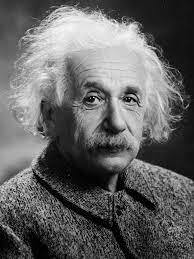

In [24]:
from PIL import Image # okutmak icin PUIL'den image'i import
im = Image.open('/content/drive/MyDrive/NLP/Einstein.jpg')
display(im);

In [ ]:
# yukarda tanimlaidigmiz imgae tot exte pathi aynen veririz
image_to_text('/content/drive/MyDrive/NLP/Einstein.jpg', max_new_tokens=16) # resmi kac token sayisi ile aciklasin. 1 milyon desek de
# cok kisa textlerle egitildigi icin yine de kisa cevap verir

[{'generated_text': 'a man with a beard and a tie '}]

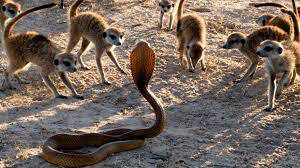

In [25]:
im = Image.open('/content/drive/MyDrive/NLP/sneak.jpg')
display(im);

In [29]:
image_to_text("/content/drive/MyDrive/NLP/sneak.jpg", max_new_tokens=16)

[{'generated_text': 'a herd of animals standing on top of a dirt field '}]

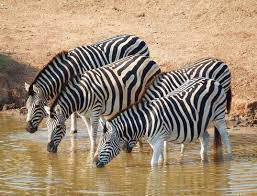

In [ ]:
im = Image.open('/content/drive/MyDrive/pictures/zebra.jpg')
display(im);

In [ ]:
image_to_text('/content/drive/MyDrive/pictures/zebra.jpg', max_new_tokens=16)
# genis perspektifte daha iyi sonuc veriyor

[{'generated_text': 'zebras drinking water from a pond '}]

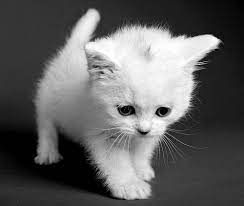

In [ ]:
im = Image.open('/content/drive/MyDrive/pictures/cat.jpg')
display(im);

In [ ]:
image_to_text('/content/drive/MyDrive/pictures/cat.jpg', max_new_tokens=16)

[{'generated_text': 'a white kitten sitting on a white surface '}]